<a href="https://colab.research.google.com/github/Rizariz/ceos-sar-guide/blob/main/03_02_Briefly_About_Synthetic_Aperture_Radar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **2 Briefly about Synthetic Aperture Radar**

##### **2.1 The radar wavelength**

Synthetic Aperture Radar, SAR, is an active system operating in the microwave domain of the electromagnetic spectrum. Microwaves are not visible to the human eye and provide a very different view of the world from what we are used to. 

While optical remote sensing sensors function similar to the human eye – they are passive sensors which record reflected sunlight – a radar sensor operates more like a flash camera in a dark room. The radar emits a light pulse and records the part of the pulse that is reflected, or scattered, back to the sensor (hence the term backscatter). Unlike sunlight which is non-polarised and comprises a large range of different wavelengths, the radar is a laser which operates within narrow and well-defined wavelength bands, and at a specific polarisation.

Common present and near-future spaceborne radar systems operate with the following bands:
* P-band: ~69.0 cm (BIOMASS) 
* L-band: ~23.5 cm (ALOS -2 PALSAR-2, SAOCOM-1, NISAR-L)
* S-band: ~9.4 cm (NovaSAR, NISAR-S)
* C-band: ~5.6 cm (Sentinel-1, Radarsat-2, RCM)
* X-band: ~3.1 cm (TerraSAR-X, TanDEM-X, COSMO-SkyMed)






The choice of wavelength band strongly affects what type (size) of objects the radar is sensitive to. As a rule of thumb, the radar “can see” objects of about the same spatial magnitude as the radar wavelength, and larger. Objects significantly smaller than the radar wavelength, become transparent to the radar, although they cause certain attenuation of the signal. The smaller the objects, the less influence (attenuation) on the backscatter.

Longer wavelength radar signals (such as L-band) consequently penetrate through the forest canopy (since the small leaves are transparent) and interact with the larger structures such as the trunks and larger branches of trees – and hence display a positive, although limited, correlation with above-ground biomass. Systems operating at shorter wavelengths (such as C-band) on the other hand, are more sensitive to sparse and low biomass vegetation.

#####**2.2 Polarisation**

The radar polarisation is another parameter affecting the strength of the backscatter. Current spaceborne radar systems operate with linear polarisation, where the radar signals are transmitted and received at horizontal (H) and/or vertical (V) polarisation. 

The polarisation of SAR imagery are commonly denoted by two letters, the first indicating the transmitted polarisation and the latter the received polarisation. 

* HH: Transmission of horizontal wave; Reception of horizontal component
* HV: Horizontal transmission; Vertical reception
* VH: Vertical transmission; Horizontal reception
* VV: Vertical transmission; Vertical reception
* Quad-pol (QP): H and V transmission; H and V reception (HH+HV+VH+VV)

HH and VV are commonly referred to as co-polarisation (or like-polarisation) backscatter components, while cross-polarisation connotes HV and VH.

#####**2.3 Radar backscatter**

######**2.3.1  Sigma-nought**

Radar image brightness is normally expressed in $\sigma^{o}$(sigma-nought) which is the radar backscatter per unit area. The unit of $\sigma o$ is [m2/m2], expressed in decibel (dB).

The standard formula to calculate $\sigma^{o}$ from backscatter amplitude is:
$$\sigma^{o} =10 * \log_{10}(DN^{2}) + K$$

Where DN is the image pixel digital number measured in the SAR amplitude image (or more accurately, the average pixel value over a group of pixels). 
In case the data are provided as backscatter power (where $DN_{power} = [DN_{amplitude}]^{2}$ ) the formula becomes: 
$\sigma^{o} = 10 * log_{10}(DN) + K$

K is a calibration factor which varies depending on the SAR sensor and processor system used. 

For ALOS/PALSAR and ALOS-2/PALSAR-2 (amplitude) data provided by JAXA, the calibration factor is -83.0 dB and for JERS-1 SAR mosaic data it is -84.66 dB. For Sentinel-1 data provided through the Copernicus Open Access Hub (power), the calibration factor is 0 dB.


######**Interactive: Plot Sigma-nought**

Input DN ranges depend on the format of the input data, i.e. whether expressed in linear amplitude and/or linear power.

For ALOS PALSAR where you have the original products expressed in linear amplitude and with a K of -83.0 dB:

- -40 dB:     DN(ampl, K=-83) = 141
- 0 dB:        DN(ampl, K=-83) = 14125
- +10 dB:    DN(ampl, K=-83) = 44668

For Sentinel-1 you will have:

- -40 dB:     DN(pwr, CF=0) = 0.0001
- 0 dB:        DN(pwr, CF=0) = 1.0000
- +10 dB:    DN(pwr, CF=0) = 10

The plot comparison below uses values for ALOS PALSAR.

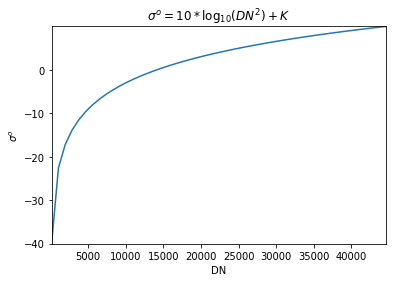

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#@title Plot sigma-nought ($\sigma^{o}$) for a range of DN values { run: "auto" }
#@markdown This interactive creates a plot of sigma-nought across arange of DN values.

# Define DN range
#@markdown Set the digital number (DN) range (min and max).
DN_min = 141 #@param {type:"slider", min:141, max:44668, step:10}
DN_max = 44661 #@param {type:"slider", min:141, max:44668, step:10}

DN_range = np.linspace(DN_min, DN_max)

#@markdown Define calibration factor K [db]
#@markdown ---
#@markdown ALOS/PALSAR = -83.0 dB
K = -83.0 #@param {type:"slider", min:-90, max:0, step:0.1}

# Define sigma-nought function

sigma_nought = 10 * np.log10(DN_range*DN_range) + K

# Plot sigma_nought
plt.title('$\sigma^{o} = 10 * \log_{10}(DN^{2}) + K$')
plot_scale = [DN_min, DN_max, np.amin(sigma_nought), np.amax(sigma_nought)]
plt.axis(plot_scale)
plt.xlabel("DN")
plt.ylabel("$\sigma^{o}$")
plt.plot(DN_range, sigma_nought)

plt.show()

######**2.3.2 Gamma-nought**

Even for homogeneous targets, $\sigma^{o}$ varies depending on the angle between the ground normal and the sensor – the incidence angle – being higher (brighter) in the near-range part of the image (closest to the satellite) and lower (darker) in the far-range of the image, further away from the satellite. By normalising  $\sigma^{o}$ with respect to the incidence angle we can remove some (but not all) of the range-dependency to obtain  $\gamma^{o}$ (gamma-nought):
 $\gamma^{o}=\sigma^{o}/cos\phi$,where $\phi$ is the incidence angle.


######**Interactive: Plot a Sigma-nought ($\sigma^{o}$) and gamma-nought ($\gamma^{o}$) and Gamma-nought**
This interactive creates two plots assuming the DN range and K for ALOS PALSAR
- A randomly generated $\sigma^{o}$ over a range of incidence angles theta ($\theta$).
- A transformation of that $\sigma^{o}$ to $\gamma^{o}$.

Note that to compute $\gamma^{o}$, we use a smooth elipsoid incidence angle $\theta$ rather than the local incidence angle. i.e. we assume the world is a perfect sphere without any topography (hills or valleys).

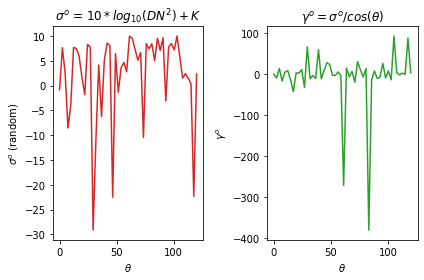

In [ ]:
#@title Plot sigma-nought ($\sigma^{o}$) and gamma-nought ($\gamma^{o}$)  { run: "auto" }

#@markdown Define incidence angle range theta [$\theta$]
theta_min = 0 #@param {type:"slider", min:0, max:120, step:1}
theta_max = 120 #@param {type:"slider", min:0, max:120, step:1}

theta_range = np.linspace(theta_min, theta_max)

DN_random = [np.random.uniform(min(DN_range),max(DN_range)) for _ in range(DN_range.size)]
DN_random_2 = [DN ** 2 for DN in DN_random]

sigma_nought = 10 * np.log10(DN_random_2) + K
gamma_nought = sigma_nought/np.cos(theta_range)

#Plot sigma_nought & gamma-nought subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(theta_range, sigma_nought,'tab:red')
ax1.set_title('$\sigma^{o}$ = $10 * log_{10}(DN^2) + K$')
ax1.set_xlabel("$\\theta$")
ax1.set_ylabel("$\sigma^{o}$ (random)")
ax2.set_title('$\gamma^{o}=\sigma^{o}/cos(\\theta$)')
ax2.plot(theta_range,gamma_nought,'tab:green')
ax2.set_xlabel("$\\theta$")
ax2.set_ylabel("$\gamma^{o}$")
fig.tight_layout()


##### **2.4 Backscatter mechanisms**

In order to accurately interpret the content of a SAR image, some basic understanding of how radar signals interact with different land cover types is required. Below follows a short description of some of the most important backscatter mechanisms to keep in mind.

######**2.4.1 Direct backscatter**

Direct backscatter occurs when the transmitted signal is reflected directly back to the sensor by a single reflection, by a surface oriented perpendicular to the radar illumination direction. It results in a strong co-polarisation (HH or VV) reflection and appears bright in the SAR image.

Rock outcrops or bare mountain slopes oriented towards the radar can produce direct backscattering. At the short C-band wavelength, also the leaves in a dense vegetation canopy can cause direct scattering.

Direct scattering on surface facing the radar
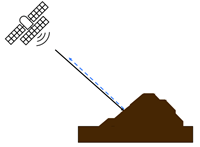

Direct scattering on surface facing the radar
<img src="https://raw.githubusercontent.com/gamedaygeorge/ceos-sar-guide/5736b93bd5ffbfef0d1b9ca5ffb7084ec2993cec/Laymans_SAR_Images/1.%20Direct%20scattering%20on%20surface%20facing%20the%20radar.png" width="500px"></img>

![image.png](https://raw.githubusercontent.com/gamedaygeorge/ceos-sar-guide/5736b93bd5ffbfef0d1b9ca5ffb7084ec2993cec/Laymans_SAR_Images/1.%20Direct%20scattering%20on%20surface%20facing%20the%20radar.png)

Direct forest canopy scattering (short radar wavelengths)
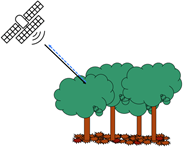

######**2.4.2 Forward scattering**

A smooth surface (relative to the radar wavelength), such as a calm water surface or (at longer wavelengths) a bare soil area results in little or no scattering back towards the radar antenna as the transmitted signal reflects once on the surface and continues its path away from the SAR antenna. Areas with forward scattering appear dark in the SAR image in both co- and cross-polarisation.

Forward scattering on smooth surface
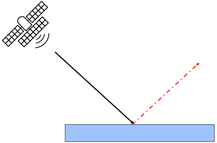

######**2.4.3 Diffuse scattering**

A rough surface (relative to the radar wavelength), such as a ploughed field or waves on water, results in the signal being scattered in different directions. The component reflected back towards the radar (direct scatter) is measured. The rougher the surface, the higher the (co-pol) backscatter.

Diffuse scattering on "rough" surface
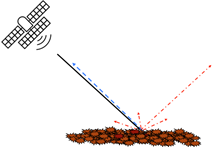IMAGES

Diffuse scattering on rough water surface
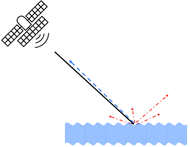

######**2.4.4a Double-bounce scattering**

When the targets and ground surface are perpendicular, such as vertical tree stems on flat ground, they can act as corner reflectors, providing a “double-bounce” scattering effect that sends the radar signals back in the same direction they came from. Since multiple radar waves reflecting on a particular vertical target travel the exactly same total distance, no matter where on the target the reflection occurs, all returning waves remain coherent (have the same phase) and thus result in an enhanced return signal. As reflections on vertical targets do not alter the polarisation direction of the radar signals, double-bounce scattering occurs only at co-polarisation.

Double-bounce Diffuse type
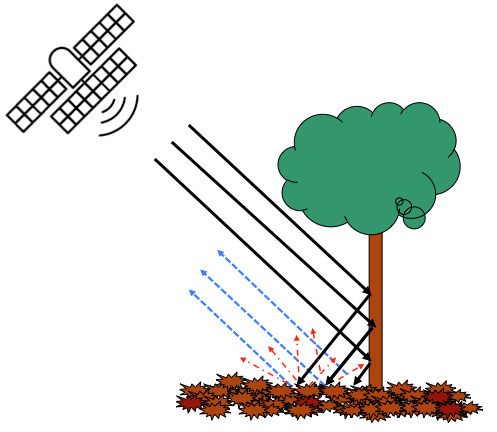





Double-bounce Specular type
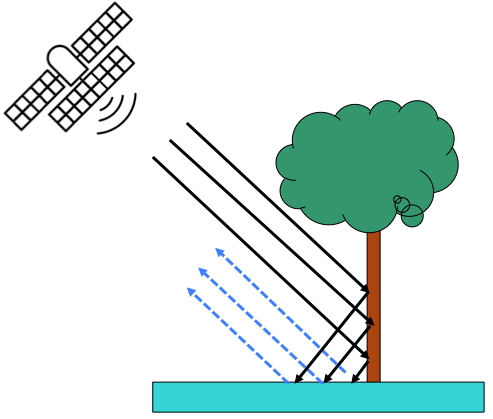

Specular double-bounce on buildings facing the radar
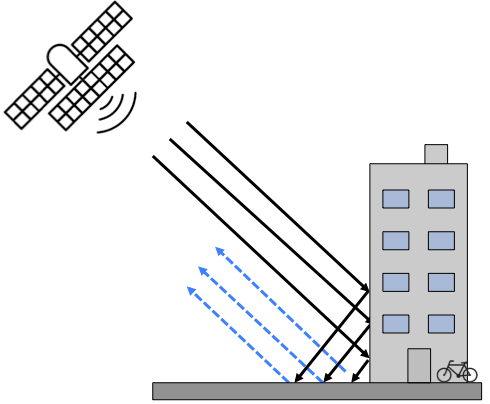

######**2.4.4b Double-bounce scattering – specular type**

In the case the forest floor is flooded, the diffuse scatter on the ground is replaced with a (loss-less) specular reflection on the water surface, resulting in a particularly strong co-polarised return signal. Specular double-bounce scattering can under certain circumstances also be observed e.g. in urban areas with buildings oriented towards the radar, in open waters by ships, bridges and oil platforms, as well as in irrigated rice fields through interactions between the plant stems (when vertical) and the water surface.

######**2.4.5  Volume scattering**

Volume scattering occurs when the radar signal is subject to multiple reflections within                      3-dimensional matter. At L-band, a common type of volume scattering is the one that occurs on twigs and branches within a forest canopy. At the shorter C-band wavelength, volume scattering can take place within the canopies of lower or sparse vegetation types, such as bushes, shrubs or agricultural crops. Since the orientation of the main scatterers is random, the polarisation of the backscattered signal is also random, rendering equal backscatter in co- and cross-polarisation. 

Volume scattering in a vegetation canopy
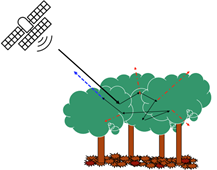


It should be noted that the scattering mechanisms described above seldom occur in isolation. The backscatter for a particular land cover type observed in a SAR image is typically the result of a combination of several mechanisms, where the total backscatter measured is the sum of the relevant different contributions ($\gamma^{o}_{TOTAL}$= $\gamma^{o}_{DIRECT} + \gamma^{o}_{DOUBLE-BOUNCE} + \gamma^{o}_{VOLUME} + \gamma^{o}_{ETC}$)